In [1]:
data = read.csv("Project Data.csv")

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

In [3]:
head(data)

Gender,Nationality,PlaceofBirth,StageID,Topic,Semester,Raisedhands,Visted.Resources,AnnouncementsView,Discussions,Parent.Satisfaction,Absences,Class.Size
M,KW,Kuwait,Elementary,IT,F,15,16,2,20,Good,Under-7,M
M,KW,Kuwait,Elementary,IT,F,20,20,3,25,Good,Under-7,M
M,KW,Kuwait,Elementary,IT,F,10,7,0,30,Bad,Above-7,L
M,KW,Kuwait,Elementary,IT,F,30,25,5,35,Bad,Above-7,L
M,KW,Kuwait,Elementary,IT,F,40,50,12,50,Bad,Above-7,M
F,KW,Kuwait,Elementary,IT,F,42,30,13,70,Bad,Above-7,M


# 1. Does a student’s absences have an effect on how many times they raise their hands? 

In [4]:
data$Absences = as.factor(data$Absences)

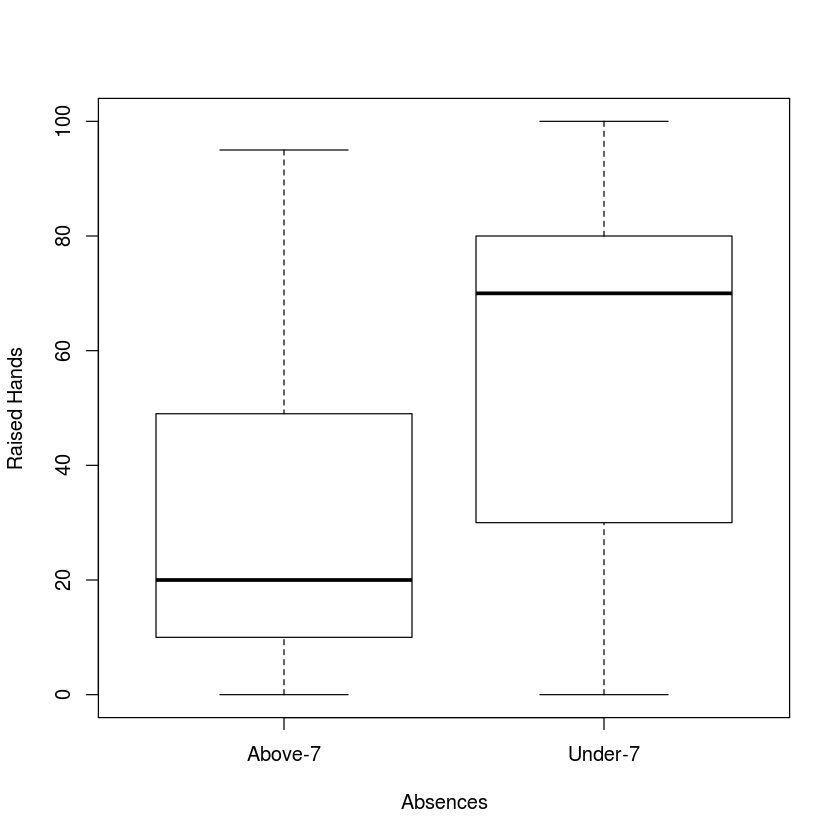

In [5]:
plot(data$Absences,data$Raisedhands,
     xlab="Absences",
     ylab="Raised Hands")

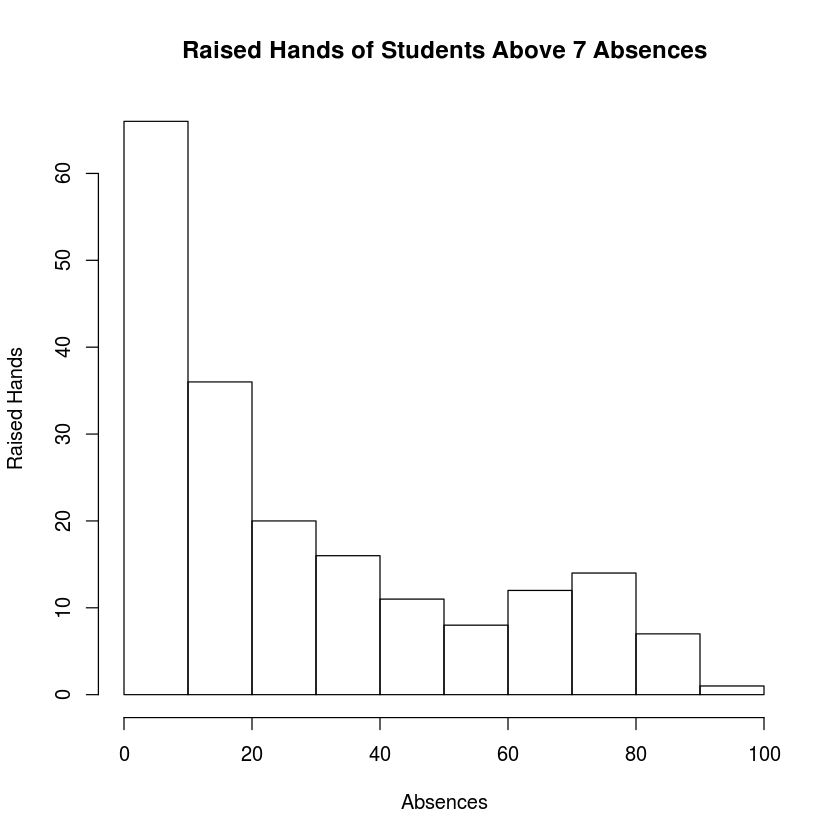

In [52]:
hist(data$Raisedhands[data$Absences == "Above-7"],
    xlab="Absences",
     ylab="Raised Hands",
    main="Raised Hands of Students Above 7 Absences")

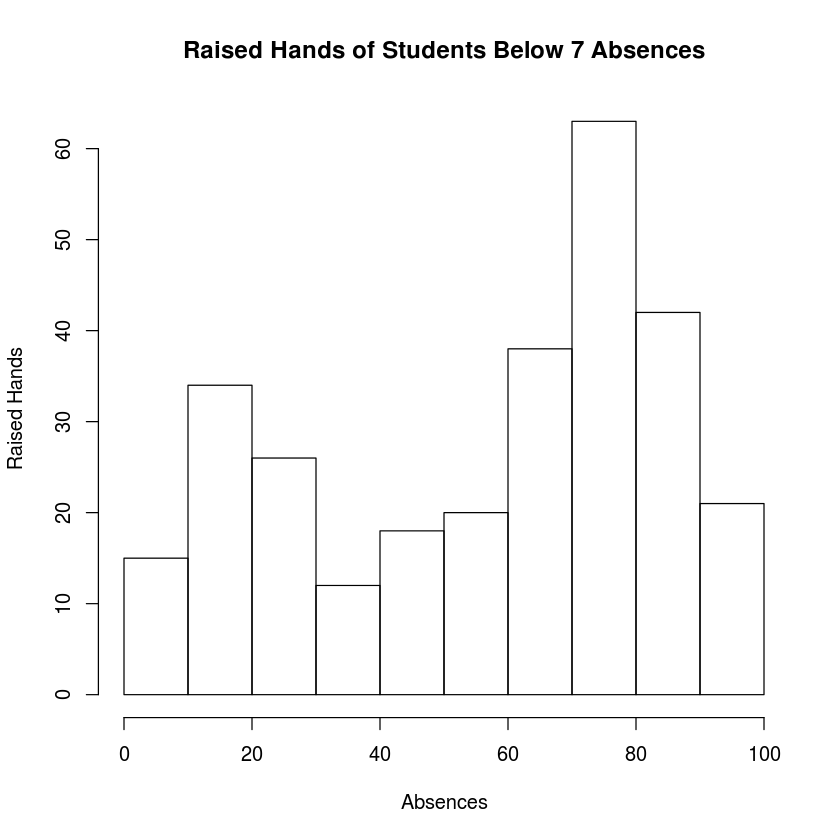

In [54]:
hist(data$Raisedhands[data$Absences == "Under-7"],
xlab="Absences",
     ylab="Raised Hands",
    main="Raised Hands of Students Below 7 Absences")

In [8]:
x=(data$Raisedhands[data$Absences == "Above-7"])

In [9]:
y = data$Raisedhands[data$Absences == "Under-7"]

In [10]:
library(BSDA)
library(repr)

Loading required package: lattice

Attaching package: 'BSDA'

The following object is masked from 'package:datasets':

    Orange



In [12]:
z.test(x, y, sigma.x=sd(x),sigma.y=sd(y))


	Two-sample z-Test

data:  x and y
z = -11.653, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -34.04091 -24.23885
sample estimates:
mean of x mean of y 
 29.23037  58.37024 


P - Value of 2.22e-16 = High Significance 

# 2. Do students who receive a good level of satisfaction from their parents typically stem from large class sizes?

In [13]:
summary(data)

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

In [57]:
small <- data$Class.Size == "L"
medium <- data$Class.Size == "M"
large <- data$Class.Size == "H"
good <- data$Parent.Satisfaction == "Good"
bad <- data$Parent.Satisfaction == "Bad"
classrules <- data.frame(small,medium,large,good,bad)

In [15]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [58]:
classrules

small,medium,large,good,bad
FALSE,TRUE,FALSE,TRUE,FALSE
FALSE,TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE
FALSE,TRUE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE,TRUE
FALSE,TRUE,FALSE,TRUE,FALSE
FALSE,TRUE,FALSE,TRUE,FALSE
FALSE,TRUE,FALSE,TRUE,FALSE


In [59]:
trans45 <- as(classrules, "transactions")

In [60]:
inspect(trans45)

      items         transactionID
[1]   {medium,good} 1            
[2]   {medium,good} 2            
[3]   {small,bad}   3            
[4]   {small,bad}   4            
[5]   {medium,bad}  5            
[6]   {medium,bad}  6            
[7]   {small,bad}   7            
[8]   {medium,good} 8            
[9]   {medium,good} 9            
[10]  {medium,good} 10           
[11]  {large,good}  11           
[12]  {medium,good} 12           
[13]  {small,bad}   13           
[14]  {small,bad}   14           
[15]  {large,bad}   15           
[16]  {medium,good} 16           
[17]  {medium,bad}  17           
[18]  {medium,bad}  18           
[19]  {medium,good} 19           
[20]  {large,good}  20           
[21]  {medium,bad}  21           
[22]  {medium,bad}  22           
[23]  {medium,bad}  23           
[24]  {small,bad}   24           
[25]  {small,good}  25           
[26]  {small,good}  26           
[27]  {medium,bad}  27           
[28]  {small,bad}   28           
[29]  {medium,

In [61]:
require = list(default="rhs", lhs="good")
classrules <- apriori(trans45, parameter=list(conf=0.0,supp=0.01,maxlen=2,minlen=2), appearance=require)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[5 item(s), 480 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [62]:
inspect(classrules)

    lhs       rhs      support    confidence lift      count
[1] {good} => {small}  0.08958333 0.1472603  0.5565743  43  
[2] {good} => {large}  0.24583333 0.4041096  1.3660042 118  
[3] {good} => {medium} 0.27291667 0.4486301  1.0205804 131  


# 3. Does class size have an effect on a student raising their hands

In [21]:
summary(data)

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

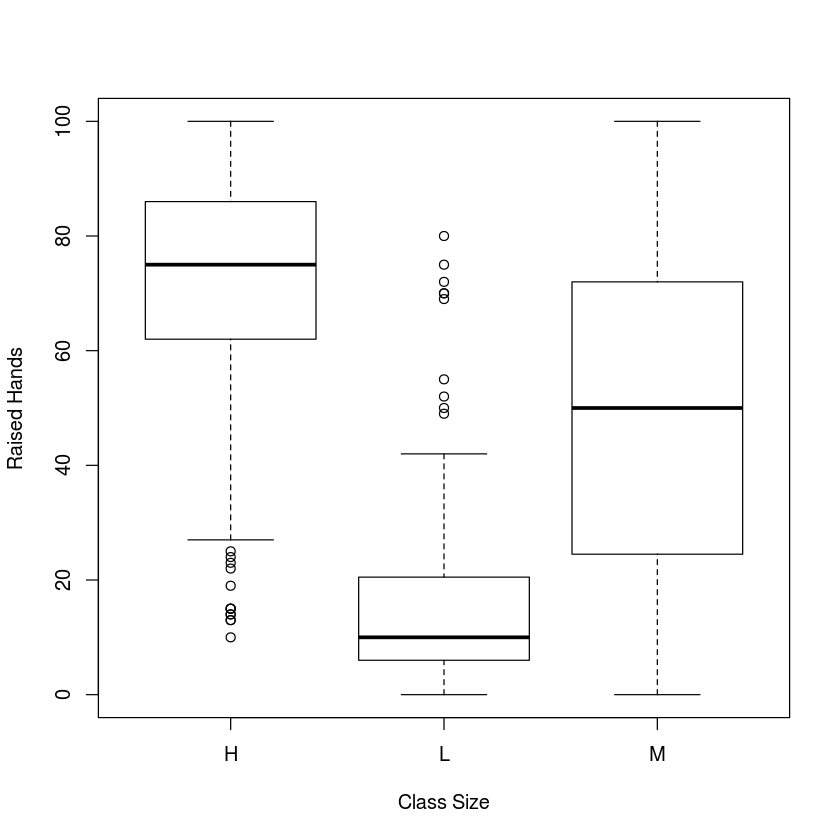

In [22]:
plot(data$Class.Size,data$Raisedhands,
     xlab="Class Size",
     ylab="Raised Hands")

In [24]:
data$Class.Size2 = factor(data$Class.Size, levels=c("Low","M","H"), labels =c("1","2","3"))

In [25]:
summary(data)

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

In [27]:
data$Class.Size2 = as.numeric(data$Class.Size2)

In [28]:
summary(as.factor(data$Class.Size2))

1   2   3 
127 211 142

In [30]:
cor.test(data$Class.Size2,data$Raisedhands, method="spearman")

Warning message in cor.test.default(data$Class.Size2, data$Raisedhands, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  data$Class.Size2 and data$Raisedhands
S = 6463200, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6493483 


# 4. How often do students who visited resources also view announcements? 

In [35]:
Low_Engagement <- data$AnnouncementsView < 15
High_Engagement <- data$AnnouncementsView > 30
Not_Resourceful <- data$Visted.Resources < 15
Resourceful <- data$Visted.Resources > 30
classrules2 <- data.frame(Low_Engagement,High_Engagement,Not_Resourceful,Resourceful)

In [36]:
classrules2

Low_Engagement,High_Engagement,Not_Resourceful,Resourceful
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,TRUE,FALSE
FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE


In [41]:
trans8 <- as(classrules2, "transactions")

In [43]:
inspect(trans8)

      items                             transactionID
[1]   {Low_Engagement}                  1            
[2]   {Low_Engagement}                  2            
[3]   {Low_Engagement,Not_Resourceful}  3            
[4]   {Low_Engagement}                  4            
[5]   {Low_Engagement,Resourceful}      5            
[6]   {Low_Engagement}                  6            
[7]   {Low_Engagement,Not_Resourceful}  7            
[8]   {Not_Resourceful}                 8            
[9]   {}                                9            
[10]  {Resourceful}                     10           
[11]  {Resourceful}                     11           
[12]  {Not_Resourceful}                 12           
[13]  {Low_Engagement,Not_Resourceful}  13           
[14]  {Low_Engagement,Not_Resourceful}  14           
[15]  {High_Engagement,Resourceful}     15           
[16]  {Resourceful}                     16           
[17]  {}                                17           
[18]  {High_Engagement,Not_R

In [44]:
require = list(default="rhs", lhs=c("Resourceful","Not_Resourceful"))
classrules2 <- apriori(trans8, parameter=list(conf=0.0,supp=0.01,maxlen=2,minlen=2), appearance=require)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[4 item(s), 480 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [46]:
classrules2.sorted <- sort(classrules2, by="lift")
inspect(classrules2.sorted)

    lhs                  rhs               support    confidence lift     
[1] {Not_Resourceful} => {Low_Engagement}  0.13333333 0.64646465 2.5644879
[2] {Resourceful}     => {High_Engagement} 0.47916667 0.71207430 1.3247894
[3] {Resourceful}     => {Low_Engagement}  0.06666667 0.09907121 0.3930097
[4] {Not_Resourceful} => {High_Engagement} 0.02083333 0.10101010 0.1879258
    count
[1]  64  
[2] 230  
[3]  32  
[4]  10  
